In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,...,2800.0,NaN,NaN,0,1,0,0,0,0,72
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,...,NaN,1600.0,NaN,0,1,0,0,0,0,103
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,...,NaN,690.0,NaN,0,0,0,0,0,0,49
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,...,1600.0,1400.0,NaN,0,0,0,0,1,2,49
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,...,NaN,NaN,NaN,0,1,0,0,0,0,49


In [4]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    65
price_per_sqft           27
area                     65
areaWithType             47
bedRoom                  47
bathroom                 47
balcony                  47
floorNum                 66
facing                 1152
agePossession             0
super_built_up_area    1935
built_up_area          2117
carpet_area            1906
plot_area              3168
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

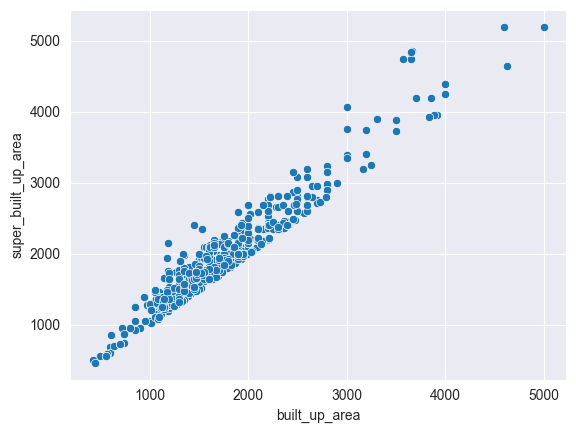

In [6]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])


<Axes: xlabel='built_up_area', ylabel='carpet_area'>

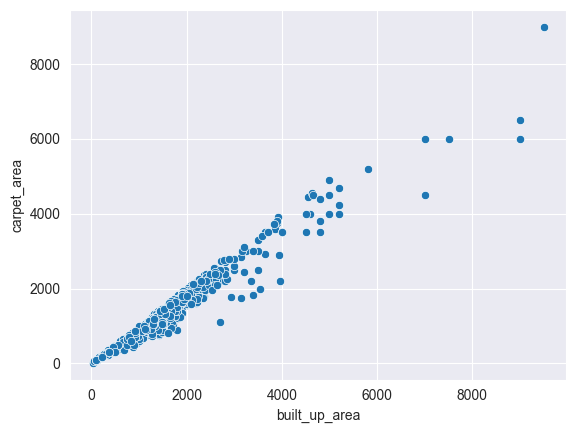

In [8]:

sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [10]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).shape

(3850,)

In [14]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]
all_present_df.shape


(534, 24)

In [17]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
super_to_built_up_ratio


1.1048701298701298

In [18]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio

0.900140056022409

In [19]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]


In [21]:
sbc_df.head()

(428, 24)

In [24]:
sbc_df.loc[:, 'built_up_area'] = sbc_df['built_up_area'].fillna(
    round(((sbc_df['super_built_up_area'] / 1.105) + (sbc_df['carpet_area'] / 0.9)) / 2)
)


In [25]:
sbc_df.shape

(428, 24)

In [31]:
sbc_df['built_up_area'].isnull()

1       False
9       False
26      False
50      False
63      False
        ...  
3801    False
3813    False
3822    False
3823    False
3844    False
Name: built_up_area, Length: 428, dtype: bool

In [32]:
df.update(sbc_df)

In [33]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    65
price_per_sqft           27
area                     65
areaWithType             47
bedRoom                  47
bathroom                 47
balcony                  47
floorNum                 66
facing                 1152
agePossession             0
super_built_up_area    1935
built_up_area          1689
carpet_area            1906
plot_area              3168
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [34]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [35]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,...,NaN,NaN,NaN,0,1,0,0,0,0,49
17,flat,emaar gurgaon greens,sector 102,1.40,8484.0,1650.0,Super Built up area 1650(153.29 sq.m.),3.0,3.0,3,...,NaN,NaN,NaN,0,1,0,0,0,2,83
20,flat,godrej nature plus,sector 33,1.30,8349.0,1557.0,Super Built up area 1557(144.65 sq.m.),3.0,2.0,3+,...,NaN,NaN,NaN,0,0,0,0,0,0,38
21,flat,m3m merlin,sector 67,3.50,14843.0,2358.0,Super Built up area 2358(219.07 sq.m.),3.0,4.0,3+,...,NaN,NaN,NaN,0,1,0,0,0,2,158
25,flat,dlf regal gardens,sector 90,1.25,7167.0,1744.0,Super Built up area 1744(162.02 sq.m.),3.0,3.0,2,...,NaN,NaN,NaN,0,0,0,0,1,0,14


In [36]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_15372\1200380189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\RAHUL\AppData\Local\Temp\ipykernel_15372\1200380189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(rou

In [37]:
sb_df.loc[:, 'built_up_area'] = sb_df['built_up_area'].fillna(
    round(sb_df['super_built_up_area'] / 1.105)
)

In [38]:
df.update(sb_df)

In [39]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    65
price_per_sqft           27
area                     65
areaWithType             47
bedRoom                  47
bathroom                 47
balcony                  47
floorNum                 66
facing                 1152
agePossession             0
super_built_up_area    1935
built_up_area           786
carpet_area            1906
plot_area              3168
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [40]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [41]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,...,NaN,690.000000,NaN,0,0,0,0,0,0,49
6,flat,emaar digihomes,sector 62,3.95,15262.0,2588.0,Carpet area: 2588 (240.43 sq.m.),3.0,3.0,3,...,NaN,2588.000000,NaN,0,1,0,0,0,2,49
7,flat,godrej summit,sector 104,0.82,9854.0,832.0,Carpet area: 77.31,2.0,2.0,3,...,NaN,77.310000,NaN,1,0,0,0,0,0,120
12,flat,dlf the grove,sector 43,6.00,25000.0,2400.0,Carpet area: 2400 (222.97 sq.m.),4.0,4.0,2,...,NaN,2400.000000,NaN,0,1,0,0,0,2,49
18,flat,adani aangan arcade,sector 88a,0.45,7194.0,626.0,Carpet area: 625.47 (58.11 sq.m.),2.0,2.0,1,...,NaN,625.490229,NaN,0,0,0,0,0,0,14


In [42]:
c_df.loc[:, 'built_up_area'] = c_df['built_up_area'].fillna(
    round(c_df['carpet_area'] / 0.9)
)


In [43]:
df.update(c_df)

In [44]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    65
price_per_sqft           27
area                     65
areaWithType             47
bedRoom                  47
bathroom                 47
balcony                  47
floorNum                 66
facing                 1152
agePossession             0
super_built_up_area    1935
built_up_area            47
carpet_area            1906
plot_area              3168
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='price', ylabel='built_up_area'>

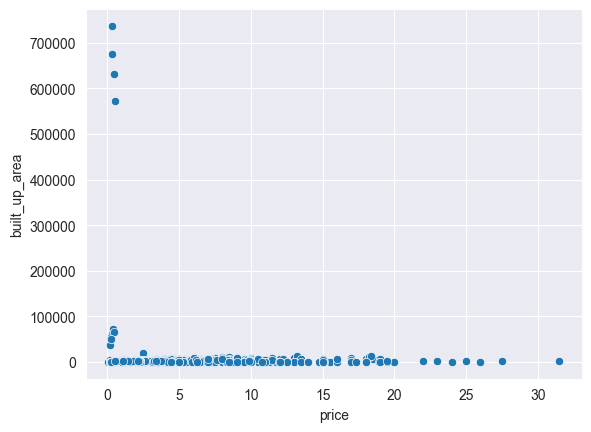

In [47]:
sns.scatterplot(y=df['built_up_area'],x=df['price'])

In [48]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [52]:
anamoly_df.sample(5)

,price,area,built_up_area
23,6.00,2700.0,2700.0
2852,5.65,5400.0,5400.0
2836,3.50,1722.0,1722.0
1589,4.50,1845.0,1845.0
1579,13.50,4518.0,4518.0


In [51]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [53]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

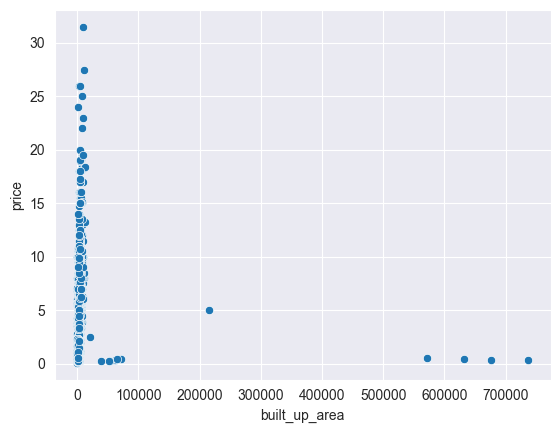

In [54]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [56]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [57]:
df.shape

(3850, 20)

In [58]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                65
price_per_sqft       27
bedRoom              47
bathroom             47
balcony              47
floorNum             66
facing             1152
agePossession         0
built_up_area        47
plot_area          3168
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [60]:
df.drop(columns=['plot_area'],inplace=True)

In [61]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                65
price_per_sqft       27
bedRoom              47
bathroom             47
balcony              47
floorNum             66
facing             1152
agePossession         0
built_up_area        47
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [62]:
df['floorNum'].isnull().sum()

66

In [63]:
df[df['property_type'] == 'house']['floorNum'].median()

3.0

In [64]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_15372\2945666234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [65]:
df['floorNum']

0        3.0
1       12.0
2        0.0
3        2.0
4        3.0
        ... 
3845     8.0
3846     1.0
3847     2.0
3848    11.0
3849     2.0
Name: floorNum, Length: 3850, dtype: float64

In [66]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                65
price_per_sqft       27
bedRoom              47
bathroom             47
balcony              47
floorNum              0
facing             1152
agePossession         0
built_up_area        47
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

<Axes: ylabel='count'>

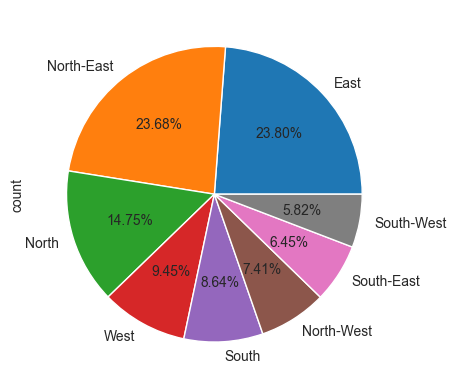

In [67]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [68]:
df.drop(columns=['facing'],inplace=True)

In [69]:
df.shape

(3850, 18)

In [70]:
df.isnull().sum()

property_type       0
society             1
sector              0
price              65
price_per_sqft     27
bedRoom            47
bathroom           47
balcony            47
floorNum            0
agePossession       0
built_up_area      47
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

In [73]:
df = df[df['balcony'].notnull()]


In [75]:
df[df['bathroom'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [76]:
df.isnull().sum()

property_type       0
society             1
sector              0
price              18
price_per_sqft     18
bedRoom             0
bathroom            0
balcony             0
floorNum            0
agePossession       0
built_up_area       0
study room          0
servant room        0
store room          0
pooja room          0
others              0
furnishing_type     0
luxury_score        0
dtype: int64

In [78]:
df[df['price_per_sqft'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
202,house,unitech espace,sector 50,NaN,NaN,5.0,5.0,3+,2.0,Moderately Old,360.0,1,0,0,0,0,0,36
402,house,independent,sector 25,NaN,NaN,12.0,12.0,3+,4.0,New Property,260.0,1,1,0,1,1,1,144
695,house,emaar mgf marbella,sector 66,NaN,NaN,4.0,4.0,3+,3.0,New Property,6500.0,1,1,1,1,0,0,136
852,house,emaar mgf marbella,sector 66,NaN,NaN,5.0,7.0,3+,2.0,Moderately Old,500.0,1,1,1,1,0,2,70
939,house,independent,sector 25,NaN,NaN,5.0,5.0,3+,2.0,Relatively New,450.0,1,1,0,1,1,2,49
1048,house,unitech uniworld resorts,sector 33,NaN,NaN,5.0,8.0,3+,4.0,Relatively New,520.0,0,1,1,0,0,2,100
1240,house,sobha city,sector 108,NaN,NaN,5.0,1.0,0,1.0,Old Property,7331.0,0,0,0,0,0,0,59
1522,house,unitech greenwood city,sector 45,NaN,NaN,9.0,9.0,3+,3.0,Relatively New,240.0,1,1,0,0,0,1,110
1664,house,emaar mgf marbella,sector 66,NaN,NaN,5.0,5.0,3+,3.0,Relatively New,350.0,1,1,0,1,0,2,160
2458,house,independent,sector 11,NaN,NaN,2.0,2.0,1,1.0,Moderately Old,1000.0,0,0,0,0,0,0,0


In [86]:
df[df['price_per_sqft'].isnull()][['price', 'price_per_sqft']]


,price,price_per_sqft


In [85]:
df = df.dropna(subset=['price'])
df['price_per_sqft'] = (df['price'] * 10000000) / df['built_up_area']



In [87]:
df[df['price_per_sqft'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [88]:
df.shape

(3803, 18)

In [89]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [90]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3826,flat,NaN,sector 78,0.6,3692.307692,2.0,2.0,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [91]:
df.drop(index=[3826],inplace=True)

In [92]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [93]:
df.shape()

TypeError: 'tuple' object is not callable

In [94]:
df.shape

(3802, 18)

In [95]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     282
Name: count, dtype: int64

In [98]:
df[df['agePossession'] == 'Undefined'].sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2844,house,independent,sector 3,0.60,6000.000000,1.0,1.0,0,1.0,Undefined,1000.0,0,0,0,0,0,0,0
1678,house,greenopolis,sector 89,0.70,5397.070162,2.0,2.0,2,14.0,Undefined,1297.0,0,0,0,0,0,0,0
1787,flat,m3m skywalk,sector 74,1.78,11251.580278,2.0,2.0,3+,12.0,Undefined,1582.0,0,0,0,0,0,0,63
3229,flat,ild greens,sector 37c,0.75,5244.755245,2.0,2.0,3+,13.0,Undefined,1430.0,0,0,0,0,0,0,51
2317,flat,aipl zen residences,sector 70a,1.40,11093.502377,2.0,2.0,2,16.0,Undefined,1262.0,0,0,0,0,0,0,0


In [99]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [100]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [101]:
df['agePossession']

0           Relatively New
1           Moderately Old
2             New Property
3             Old Property
4             New Property
               ...        
3845          New Property
3846    Under Construction
3847        Relatively New
3848        Relatively New
3849        Relatively New
Name: agePossession, Length: 3802, dtype: object

In [102]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [103]:
df['agePossession'].value_counts()

agePossession
Relatively New        1823
New Property           657
Moderately Old         621
Old Property           346
Under Construction     299
Undefined               56
Name: count, dtype: int64

In [104]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [105]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [106]:

df['agePossession'].value_counts()

agePossession
Relatively New        1837
New Property           658
Moderately Old         628
Old Property           352
Under Construction     299
Undefined               28
Name: count, dtype: int64

In [107]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [108]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [109]:
df['agePossession'].value_counts()

agePossession
Relatively New        1837
New Property           658
Moderately Old         656
Old Property           352
Under Construction     299
Name: count, dtype: int64

In [114]:
df.to_csv('gurgaon_missing_value_imputation.csv',index=False)

In [113]:
df.shape

(3802, 18)